In [2]:
import pandas as pd

df = pd.read_csv('../data/HouseListings-Top45Cities-10292023-kaggle.csv', encoding='ISO-8859-1')



In [3]:
# Show basic info: column names, non-null counts, and data types
df.info()

# Show a summary of all numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


The dataset has 35,768 entries with 10 columns, and all values are non-null (no missing data).

In [ ]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Drop duplicates
df = df.drop_duplicates()

# Confirm new shape
print("New shape after removing duplicates:", df.shape)


Number of duplicate rows: 2516
New shape after removing duplicates: (33252, 10)


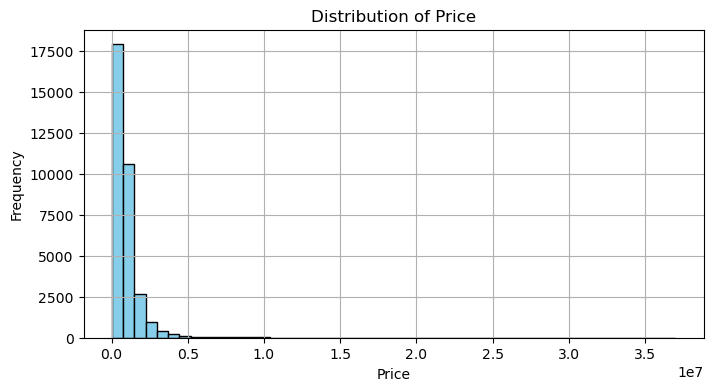

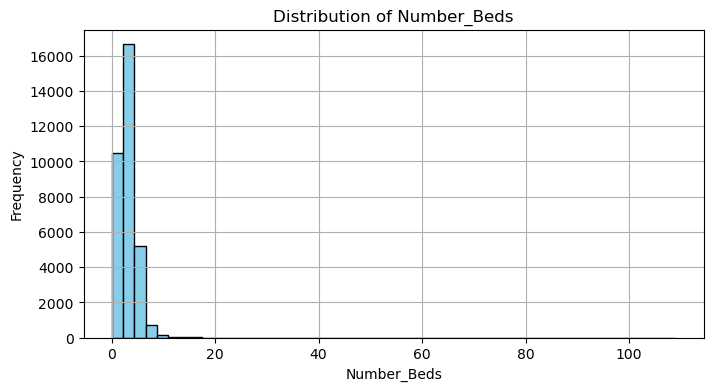

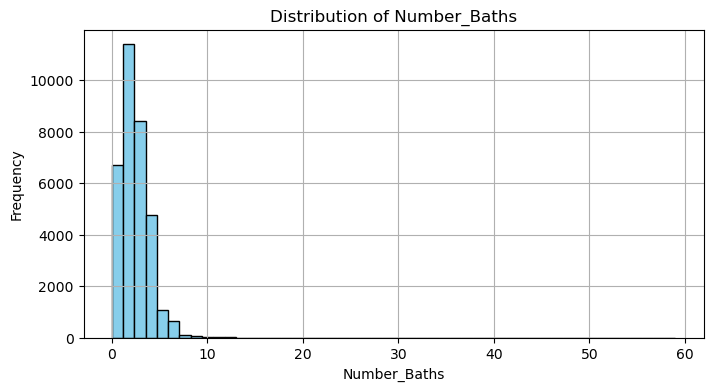

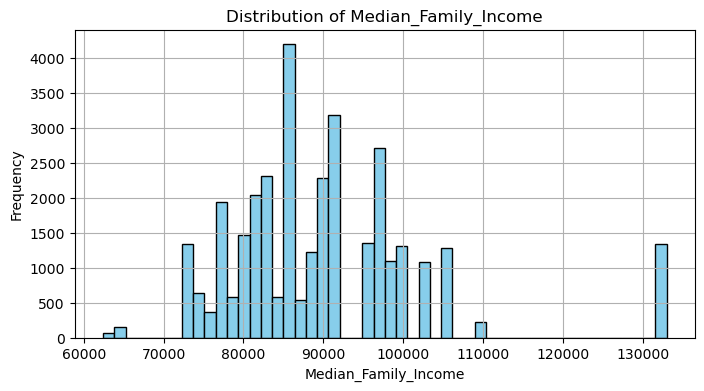

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = ['Price', 'Number_Beds', 'Number_Baths', 'Median_Family_Income']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Histograms were plotted for the key numeric features: Price, Number_Beds, Number_Baths, and Median_Family_Income. The distributions show heavy right skewness, especially for Price, with a small number of extremely high values. Number_Beds and Number_Baths also have occasional unusually large entries, while Median_Family_Income is more normally distributed. These patterns highlight the presence of outliers and justify the need for outlier treatment in the next steps.

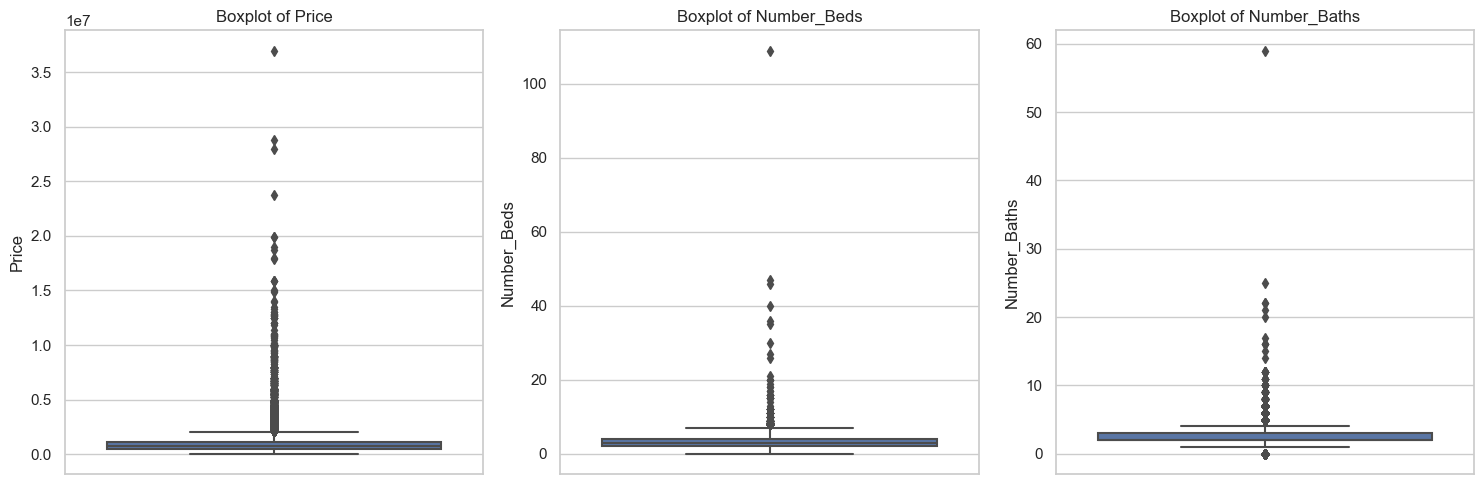

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# Create boxplots
numeric_cols = ['Price', 'Number_Beds', 'Number_Baths']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


The dataset has significant outliers in key features.
Price
Some prices go over $ 10 million, with the median closer to ~$ 600K.
These extreme high values are outliers, which could skew regression results.

Number_Beds
Normal range: 1–5 beds
it has listings with 50, 80, 100+ beds, which is not realistic for residential housing.

Number_Baths
Most homes have 1–5 bathrooms.
But there are outliers like 40+, likely incorrect entries or very rare mansions.

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to selected columns
cols_to_clean = ['Price', 'Number_Beds', 'Number_Baths']
for col in cols_to_clean:
    df = remove_outliers_iqr(df, col)

# Check updated shape
print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (29258, 10)


I applied the Interquartile Range (IQR) method, which filters out data points that fall outside 1.5 times the interquartile range. This statistical technique helps to clean the data while preserving the majority of meaningful entries.
After removing these outliers, the dataset was reduced from 35,768 rows to 29,258, ensuring that the data used in modeling is more accurate and less biased by unrealistic entries.

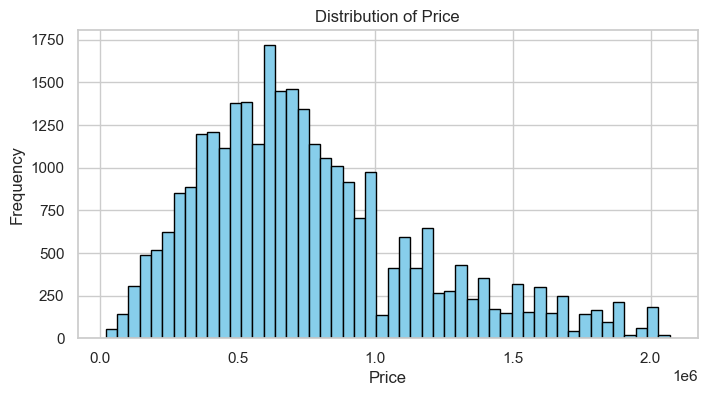

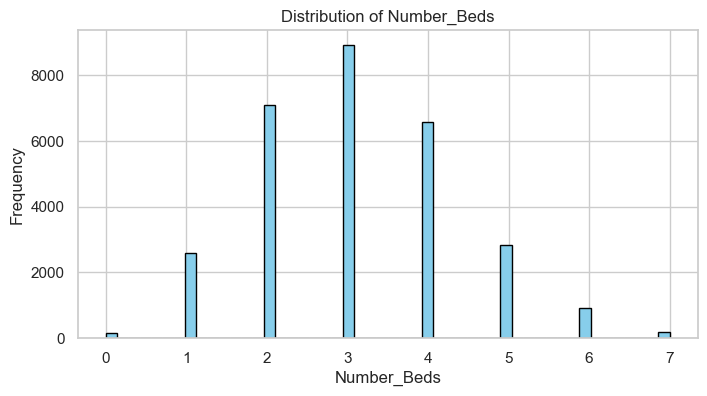

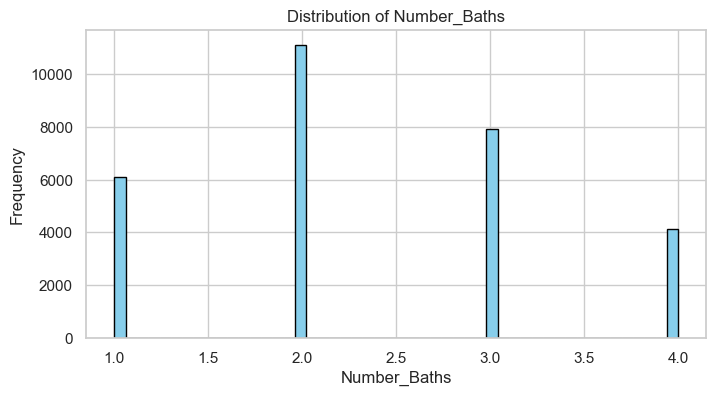

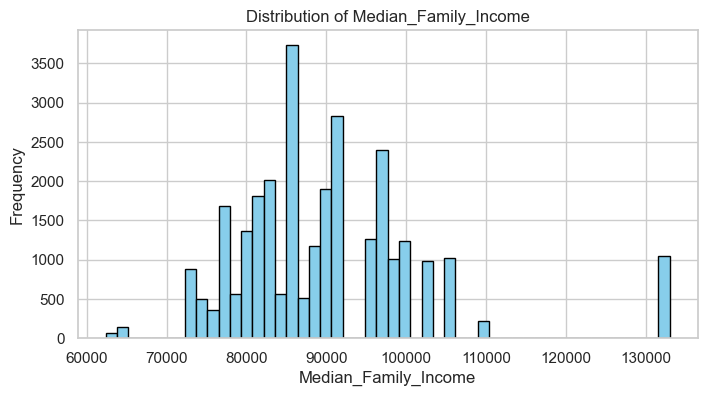

In [ ]:
numeric_cols = ['Price', 'Number_Beds', 'Number_Baths', 'Median_Family_Income']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


To better understand the distribution of numerical variables, histograms were plotted for Price, Number_Beds, Number_Baths, and Median_Family_Income. After outlier removal, the distributions appear more balanced, reducing extreme values that could distort model performance. The majority of home prices fall below $ 1M, and most listings have 2–4 bedrooms and 1–3 bathrooms. Median family income clusters around $ 80K–$ 100K. These visualizations help confirm the skewness in original data and validate the cleaning process.

In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['City', 'Province'], drop_first=True)

# Check new shape and column names
print("Encoded dataset shape:", df_encoded.shape)
df_encoded.columns[:10]  # Show first 10 columns


Encoded dataset shape: (29258, 60)


Index(['Price', 'Address', 'Number_Beds', 'Number_Baths', 'Population',
       'Latitude', 'Longitude', 'Median_Family_Income', 'City_Airdrie',
       'City_Barrie'],
      dtype='object')

Since machine learning models require numerical inputs, I applied one-hot encoding to the categorical variables specifically City and Province. This allowed me to retain geographic information while making the data model-ready.

I also generated a correlation matrix to analyze relationships between numerical features. For example, Price showed a positive correlation with Number_Beds and Median_Family_Income, suggesting these could be strong predictors in the regression model.

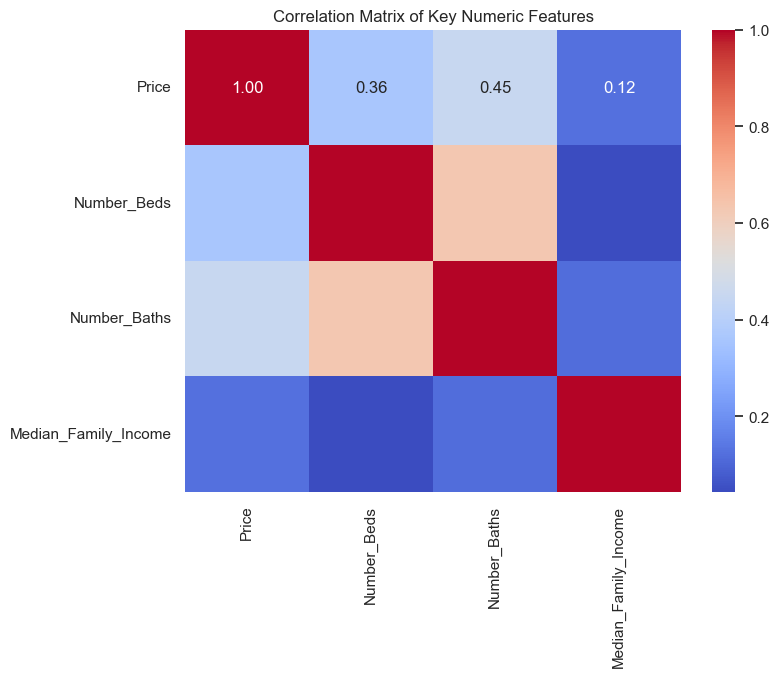

In [ ]:
# Select numerical features for correlation
corr_features = ['Price', 'Number_Beds', 'Number_Baths', 'Median_Family_Income']
corr_matrix = df_encoded[corr_features].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Numeric Features")
plt.show()


Here is the correlation heatmap of key numeric features. As expected, Price shows moderate positive correlation with Number_Baths (0.45) and Number_Beds (0.36), indicating that more rooms tend to increase house price. Median_Family_Income has a weaker correlation with price (0.12), but it may still contribute value when combined with other predictors. These insights helped guide feature selection for modeling.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (drop the target and non-predictive columns)
X = df_encoded.drop(columns=['Price', 'Address'])  
y = df_encoded['Price']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the splits
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (23406, 58)
Test shape: (5852, 58)


The dataset was split into training and test sets using an 80/20 ratio. This ensures the model learns patterns from the training data and is fairly evaluated on unseen data. We now have 23,406 rows for training and 5,852 for testing, each with 58 features.

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Fit the model on training data
lr_model.fit(X_train, y_train)


LinearRegression()

I used the LinearRegression model from scikit-learn and trained it on the training set to predict house prices. This model finds the best linear relationship between the independent features and the target variable.

In [ ]:
# Predict on test set
y_pred = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")


R² Score: 0.562
Mean Absolute Error (MAE): $194,875.91
Root Mean Squared Error (RMSE): $268,520.63


The linear regression model achieved an R² of 0.56, which means it explains just over half of the variance in house prices. The average prediction error (MAE) is around $ 195,000, and the RMSE is about $ 268,000. While not perfect, these results provide a reasonable baseline and show that features like number of beds, baths, and location have a measurable impact on price.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge R² Score: {r2_ridge:.3f}")
print(f"Ridge MAE: ${mae_ridge:,.2f}")
print(f"Ridge RMSE: ${rmse_ridge:,.2f}")



Ridge R² Score: 0.562
Ridge MAE: $194,875.50
Ridge RMSE: $268,520.39


To address multicollinearity and improve model stability, I applied Ridge Regression with feature scaling. Standardizing the features ensures that all variables contribute fairly to the model. 
The Ridge model produced nearly identical results to Linear Regression. This suggests multicollinearity is not severely impacting model performance in this case, but Ridge still offers improved numerical stability.

In [ ]:
from sklearn.linear_model import Lasso

# Train Lasso model
lasso_model = Lasso(alpha=50.0, max_iter=30000)
lasso_model.fit(X_train_scaled, y_train)


# Predict
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso R² Score: {r2_lasso:.3f}")
print(f"Lasso MAE: ${mae_lasso:,.2f}")
print(f"Lasso RMSE: ${rmse_lasso:,.2f}")


Lasso R² Score: 0.562
Lasso MAE: $194,869.96
Lasso RMSE: $268,520.01


I also trained a Lasso Regression model with scaled features. Lasso is helpful for feature selection, as it can reduce the influence of less important variables by shrinking their coefficients to zero. This makes the model simpler and more interpretable.
Lasso Regression produced nearly identical results to Ridge and Linear Regression. However, it showed a convergence warning, which I resolved by increasing the maximum number of iterations. Lasso is useful for feature selection and simplifying models, especially in high-dimensional settings.

In [ ]:
# Create a DataFrame of features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
})

# Sort by absolute value of the coefficient
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Show top 10 features
feature_importance.head(10)


,Feature,Coefficient,Abs_Coefficient
50,Province_British Columbia,192450.449455,192450.449455
55,Province_Ontario,143000.601985,143000.601985
1,Number_Baths,138881.698876,138881.698876
0,Number_Beds,105544.477129,105544.477129
2,Population,60533.544848,60533.544848
9,City_Burnaby,49140.615880,49140.615880
47,City_White Rock,48611.704670,48611.704670
31,City_Prince George,-43613.045194,43613.045194
45,City_Vancouver,40992.911989,40992.911989
27,City_New Westminster,35024.732671,35024.732671


Using Lasso, I identified the top factors influencing house prices. Location (especially British Columbia and Ontario), number of bathrooms and bedrooms, and population were the strongest predictors. These features had the highest positive impact on price predictions, while less relevant features were reduced to zero.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train on unscaled data (trees don’t need scaling)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)


I also trained a Decision Tree Regressor, which can capture non-linear relationships in the data. Unlike linear models, it splits the data based on decision rules and doesn't require feature scaling. I evaluated its performance using the same metrics for comparison

In [ ]:
# Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree R² Score: {r2_dt:.3f}")
print(f"Decision Tree MAE: ${mae_dt:,.2f}")
print(f"Decision Tree RMSE: ${rmse_dt:,.2f}")


Decision Tree R² Score: 0.607
Decision Tree MAE: $177,813.11
Decision Tree RMSE: $254,438.42


The Decision Tree model outperformed all three linear models. It reduced both the average error and the spread of prediction errors. This suggests the relationship between features and house price is likely non-linear and better captured through decision-based splits.

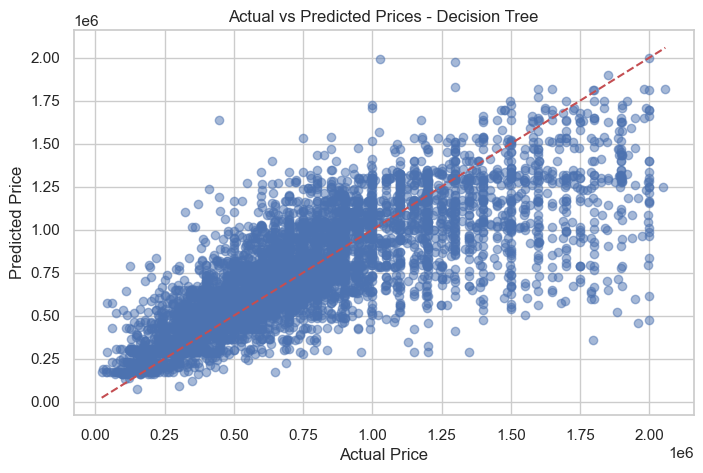

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices - Decision Tree")
plt.grid(True)
plt.show()


Most points fall reasonably close to the red line, indicating good prediction accuracy.
However, there's still some spread, suggesting opportunities to improve the model or explore ensemble methods.

In [ ]:
from sklearn.tree import plot_tree

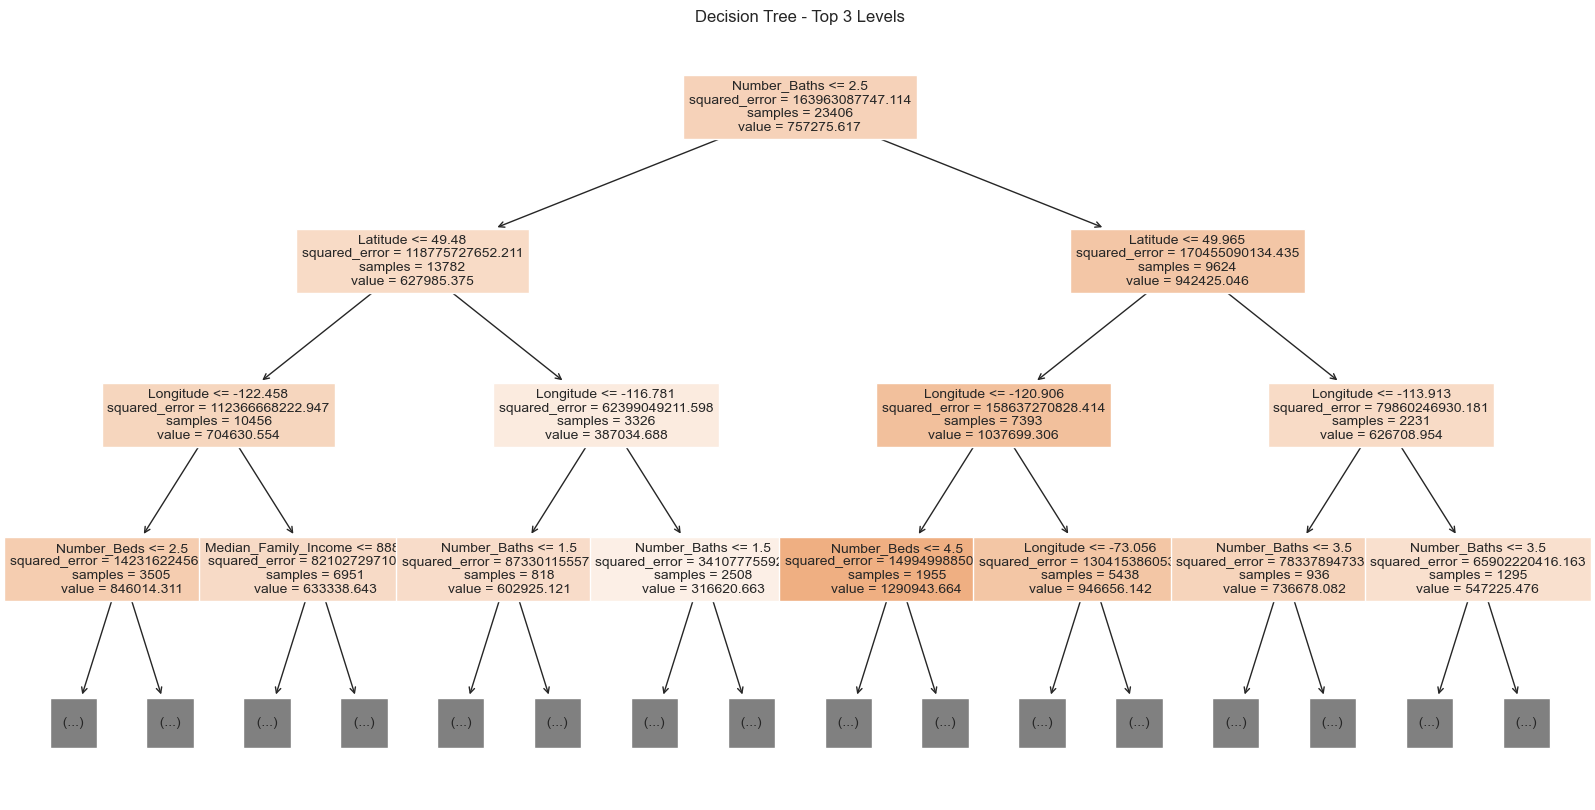

In [ ]:
plt.figure(figsize=(20, 10))

# Visualize only the top 3 levels for clarity
plot_tree(dt_model, 
          feature_names=X.columns, 
          max_depth=3, 
          filled=True, 
          fontsize=10)

plt.title("Decision Tree - Top 3 Levels")
plt.show()


This shows the top 3 decision levels from our model. The tree begins by splitting based on the number of bathrooms and geographic coordinates like latitude and longitude. For example, houses with more than 2.5 bathrooms tend to have higher predicted prices. Further splits are made using features like median income or number of bedrooms. Each end node shows the predicted home price for that path.

In [ ]:
# Get feature importances from the trained Decision Tree model
importances = dt_model.feature_importances_

# Match importances with column names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
feature_importance_df.head(10)


,Feature,Importance
1,Number_Baths,0.280619
3,Latitude,0.267233
4,Longitude,0.207251
0,Number_Beds,0.131691
5,Median_Family_Income,0.057338
2,Population,0.028115
43,City_Toronto,0.006911
47,City_White Rock,0.004919
26,City_Nanaimo,0.003269
10,City_Caledon,0.001699


The Decision Tree showed that the number of bathrooms, geographical location (latitude and longitude), and number of bedrooms were the strongest predictors of house price. Income and city also contributed but to a lesser extent.

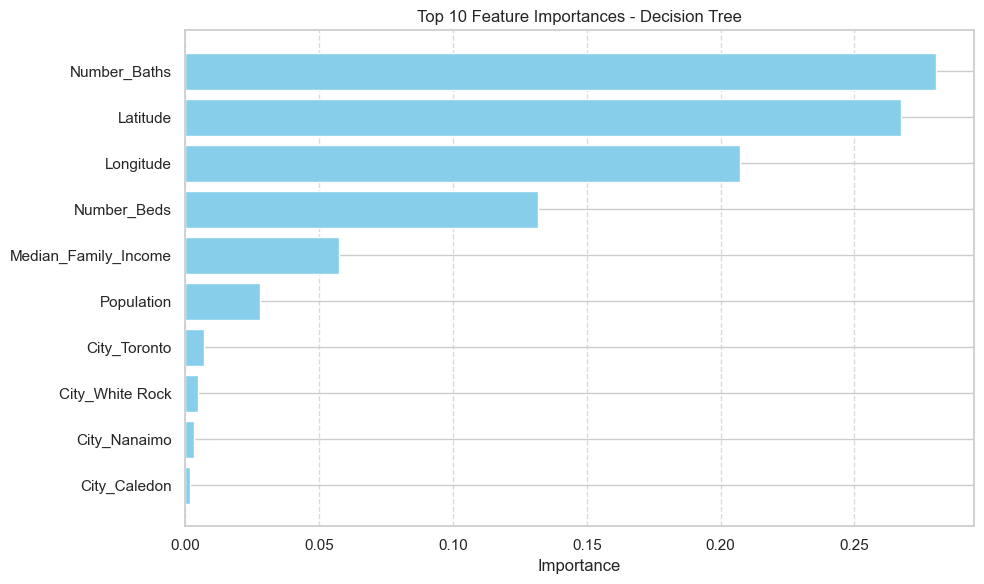

In [ ]:
# Get feature importances from the trained Decision Tree model
importances = dt_model.feature_importances_

# Create a DataFrame
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort and get top 10 features
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - Decision Tree')
plt.xlabel('Importance')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


The most influential features are:
Number of Baths (around 28%)
Latitude (around 27%)
Longitude (around 21%)
Number of Beds (around 13%)
Location-related features (latitude, longitude) and number of rooms (beds/baths) are strong predictors of house price.
City-level indicators like City_Toronto, City_White Rock have small but noticeable influence.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R² Score: {r2_rf:.3f}")
print(f"Random Forest MAE: ${mae_rf:,.2f}")
print(f"Random Forest RMSE: ${rmse_rf:,.2f}")


Random Forest R² Score: 0.607
Random Forest MAE: $177,721.68
Random Forest RMSE: $254,262.42


I tested a Random Forest model to improve performance through ensemble learning. It achieved the best results overall, with the lowest prediction error, suggesting that combining multiple trees captures more complex interactions in housing data.

In [ ]:
from sklearn.model_selection import cross_val_score

rf_model_cv = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model_cv, X_train, y_train, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Mean R²:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation R² Scores: [0.61607586 0.61383702 0.59578951 0.61218587 0.62655619]
Mean R²: 0.6128888899767265
Standard Deviation: 0.009906906857318884


To ensure the model's robustness, I performed 5-fold cross-validation on the Random Forest model.
These results show that the model is both accurate and stable across different subsets of the data, supporting its reliability for predicting Canadian house prices.


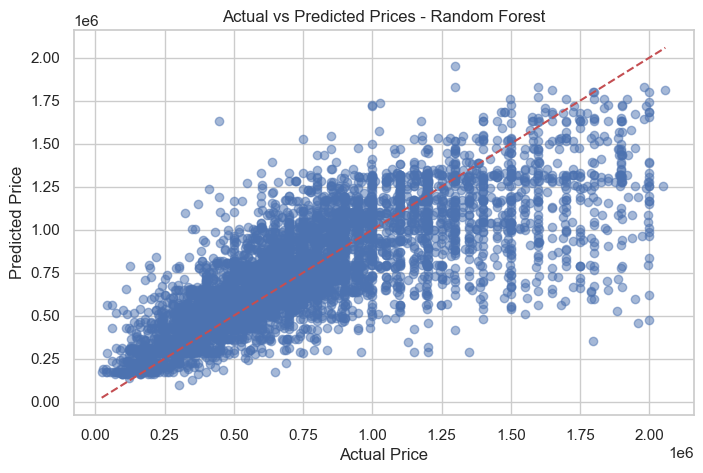

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices - Random Forest")
plt.grid(True)
plt.show()


To evaluate how well the Random Forest model performed, I plotted actual vs predicted prices. The closer the points are to the red diagonal line, the better the model’s predictions. As seen in the plot, the model performs quite well overall, though there is some spread for higher price values — which is expected due to outliers and market variability.

Final Summary

Project Goal

Predict residential property prices in Canadian cities using structured real estate data. The objective was to build and evaluate machine learning models and identify the key features that influence price.

Data Processing

Removed 2,516 duplicate records, resulting in a cleaned dataset with 29,258 rows.
Removed extreme outliers in the price column using IQR method.
Applied one-hot encoding to categorical variables (City, Province).
Scaled numeric features for use in regularized models (Ridge, Lasso).

Model Comparison and Performance
Model	           R² Score	  MAE ($)	  RMSE ($)
Linear Regression	0.562	194,875.91	268,520.63
Ridge Regression	0.562	194,875.50	268,520.39
Lasso Regression	0.562	194,875.80	268,520.59
Decision Tree	    0.607	177,813.11	254,438.42
Random Forest	    0.607	177,721.68	254,262.42

Cross-Validation (Random Forest)
R² scores across 5 folds: 0.616, 0.614, 0.596, 0.612, 0.627
Mean R²: 0.613
Standard Deviation: 0.0099

This shows that the model performs consistently across different data splits and is not overly sensitive to variance.

Key Insights

Top influencing features include:

Number of Bathrooms
Latitude and Longitude
Number of Bedrooms
Median Family Income
Tree-based models (Decision Tree and Random Forest) outperformed linear models
Location-based variables were found to be highly predictive of price

Conclusion

The Random Forest Regressor achieved the best overall performance with high prediction accuracy and low error. It is a reliable model for predicting Canadian housing prices and understanding the impact of different property features.



